In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:

def get_df(name):
    """
    This function takes in the string
    'items', 'stores', or 'sales' and
    returns a df containing all pages and
    creates a .csv file for future use.
    """
    base_url = 'https://python.zach.lol'
    api_url = base_url + '/api/v1/'
    response = requests.get(api_url + name)
    data = response.json()
    
    # create list from 1st page
    my_list = data['payload'][name]
    
    # loop through the pages and add to list
    while data['payload']['next_page'] != None:
        response = requests.get(base_url + data['payload']['next_page'])
        data = response.json()
        my_list.extend(data['payload'][name])
    
    # Create DataFrame from list
    df = pd.DataFrame(my_list)
    
    # Write DataFrame to csv file for future use
    df.to_csv(name + '.csv')
    return df

######################### Params Helper function, can be used in big_df ###############################

def get_df_params(name):
    """
    This function takes in the string
    'items', 'stores', or 'sales' and
    returns a df containing all pages and
    creates a .csv file for future use.
    """
    # Create an empty list names `results`.
    results = []
    
    # Create api_url variable
    api_url = 'https://python.zach.lol/api/v1/'
    
    # Loop through the page parameters until an empty response is returned.
    for i in range(3):
        response =  requests.get(items_url, params = {"page": i+1})    
    
        # We have reached the end of the results
        if len(response.json()) == 0:   
            break
            
        else:
            # Convert my response to a dictionary and store as variable `data`
            data = response.json()
        
            # Add the list of dictionaries to my list
            results.extend(data['payload'][name])
    
    # Create DataFrame from list
    df = pd.DataFrame(results)
    
    # Write DataFrame to csv file for future use
    df.to_csv(name + '.csv')
    
    return df


def get_store_data():
    """
    This function checks for csv files
    for items, sales, stores, and big_df 
    if there are none, it creates them.
    It returns one big_df of merged dfs.
    """
    # check for csv files or create them
    if os.path.isfile('items.csv'):
        items_df = pd.read_csv('items.csv', index_col=0)
    else:
        items_df = get_df('items')
        
    if os.path.isfile('stores.csv'):
        stores_df = pd.read_csv('stores.csv', index_col=0)
    else:
        stores_df = get_df('stores')
        
    if os.path.isfile('sales.csv'):
        sales_df = pd.read_csv('sales.csv', index_col=0)
    else:
        sales_df = get_df('sales')
        
    if os.path.isfile('big_df.csv'):
        df = pd.read_csv('big_df.csv', index_col=0)
        return df
    else:
        # merge all of the DataFrames into one
        df = pd.merge(sales_df, stores_df, left_on='store', right_on='store_id').drop(columns={'store'})
        df = pd.merge(df, items_df, left_on='item', right_on='item_id').drop(columns={'item'})

        # write merged DateTime df with all data to directory for future use
        df.to_csv('big_df.csv')
        return df

In [3]:
df = get_store_data()

In [4]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_id       913000 non-null  int64  
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_id        913000 non-null  int64  
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [7]:
def prep(df):
    df['sale_date'] = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [8]:
df = prep(df)

In [16]:
new_df = df[['sales_total']]

In [17]:
new_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,10.92
2013-01-01 00:00:00+00:00,218.40
2013-01-01 00:00:00+00:00,125.55
2013-01-01 00:00:00+00:00,453.60
2013-01-01 00:00:00+00:00,294.00


In [18]:
new_df = new_df.resample('D').sum()

In [19]:
new_df.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


# Split the Data

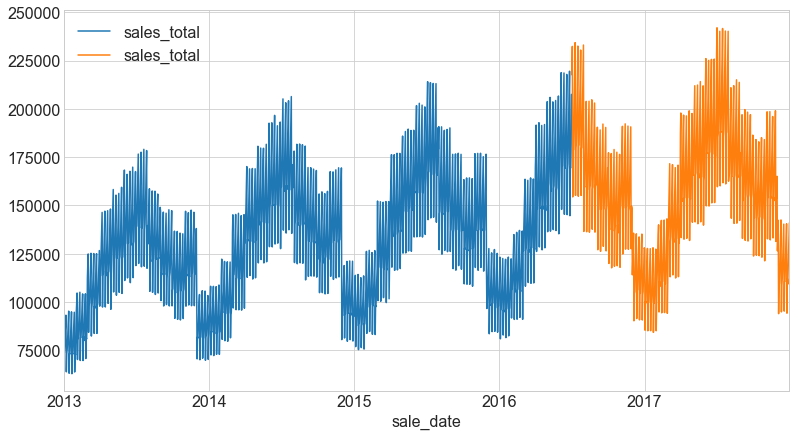

In [21]:
train_size = .70
n = new_df.shape[0]
test_start_index = round(train_size * n)

train = new_df[:test_start_index] # everything up (not including) to the test_start_index
test = new_df[test_start_index:] # everything from the test_start_index to the end

ax = train.plot()
test.plot(ax=ax)
# plt.plot(train.index, train.sales_total)
# plt.plot(test.index, test.sales_total)

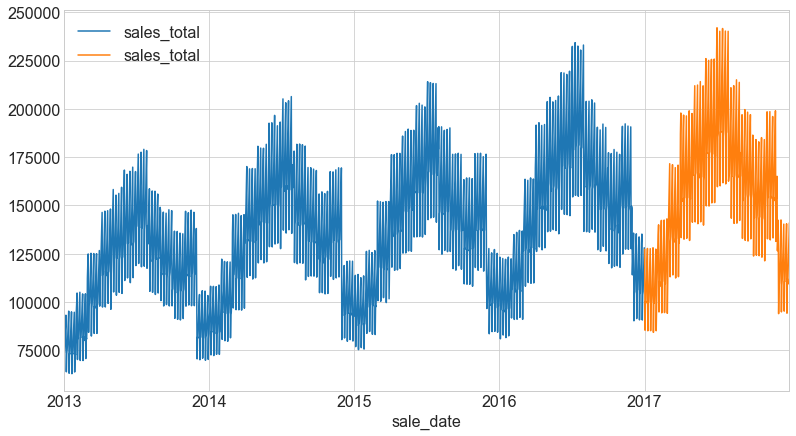

In [23]:
train = new_df[:'2016'] # includes 2016
test = new_df['2017']

# plt.plot(train.index, train.sales_total)
# plt.plot(test.index, test.sales_total)
ax = train.plot()
test.plot(ax=ax)

In [26]:
y = train.sales_total
y

sale_date
2013-01-01 00:00:00+00:00     73844.01
2013-01-02 00:00:00+00:00     73570.58
2013-01-03 00:00:00+00:00     78169.48
2013-01-04 00:00:00+00:00     84467.73
2013-01-05 00:00:00+00:00     87621.85
                               ...    
2016-12-27 00:00:00+00:00    103657.89
2016-12-28 00:00:00+00:00    105313.94
2016-12-29 00:00:00+00:00    113221.85
2016-12-30 00:00:00+00:00    120033.64
2016-12-31 00:00:00+00:00    128009.31
Freq: D, Name: sales_total, Length: 1461, dtype: float64

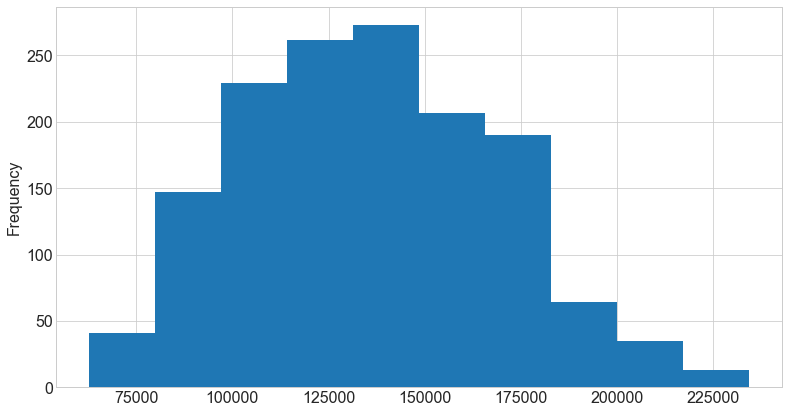

In [27]:
y.plot.hist()


In [28]:
train['month'] = train.index.month

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


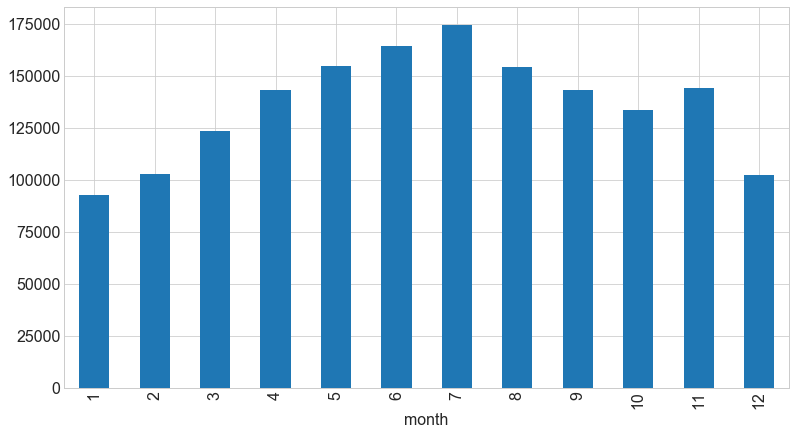

In [31]:
train.groupby('month').sales_total.mean().plot.bar()

In [32]:
train['weekday'] = train.index.day_name()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
train.head()

,sales_total,month,weekday
sale_date,,,
2013-01-01 00:00:00+00:00,73844.01,1,Tuesday
2013-01-02 00:00:00+00:00,73570.58,1,Wednesday
2013-01-03 00:00:00+00:00,78169.48,1,Thursday
2013-01-04 00:00:00+00:00,84467.73,1,Friday
2013-01-05 00:00:00+00:00,87621.85,1,Saturday


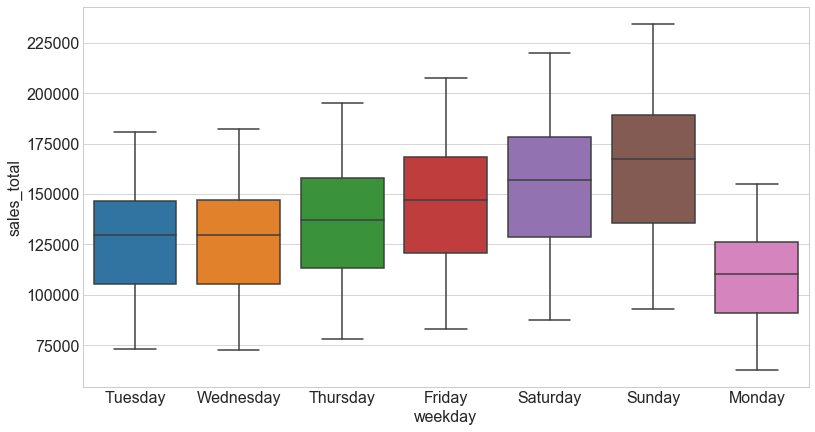

In [34]:
sns.boxplot(data=train, y='sales_total', x='weekday')

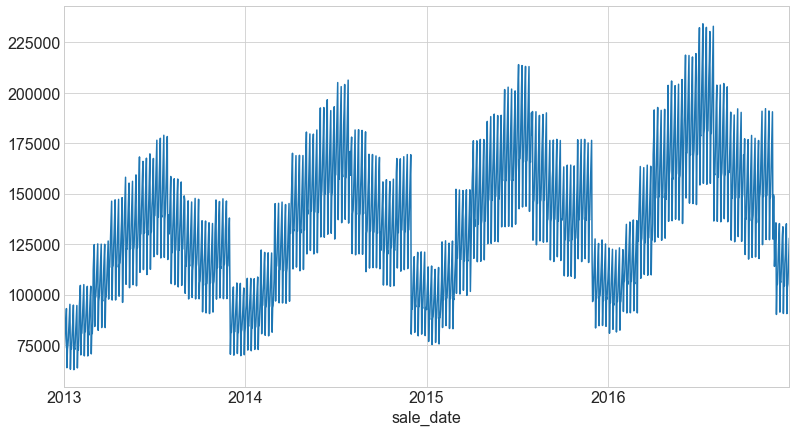

In [35]:
y.plot()

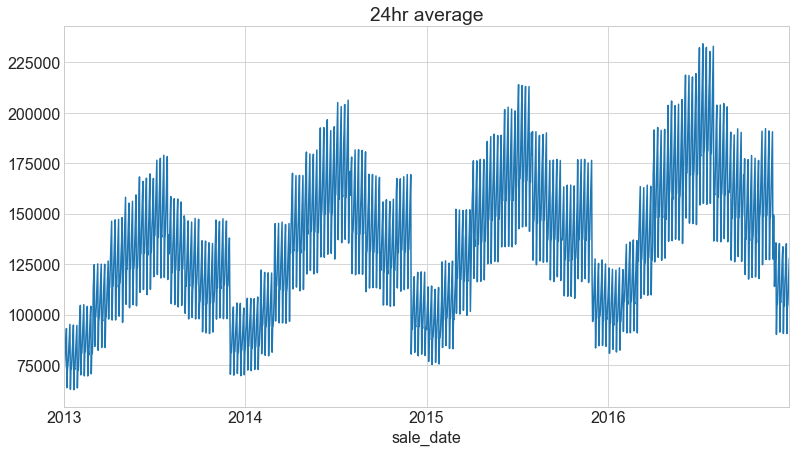

In [39]:
y.resample('24h').mean().plot(title='24hr average')


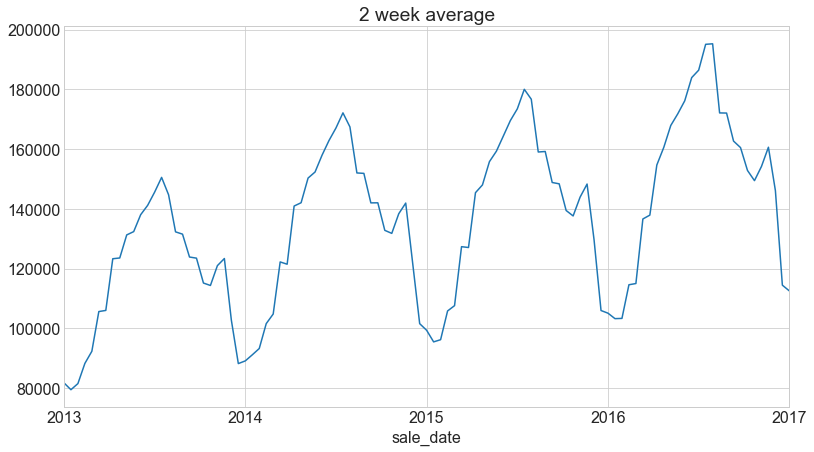

In [40]:
y.resample('2W').mean().plot(title='2 week average')


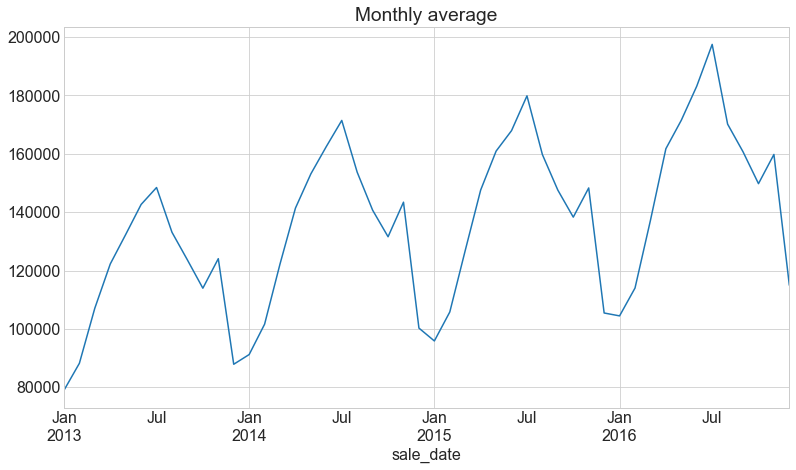

In [41]:
y.resample('M').mean().plot(title='Monthly average')


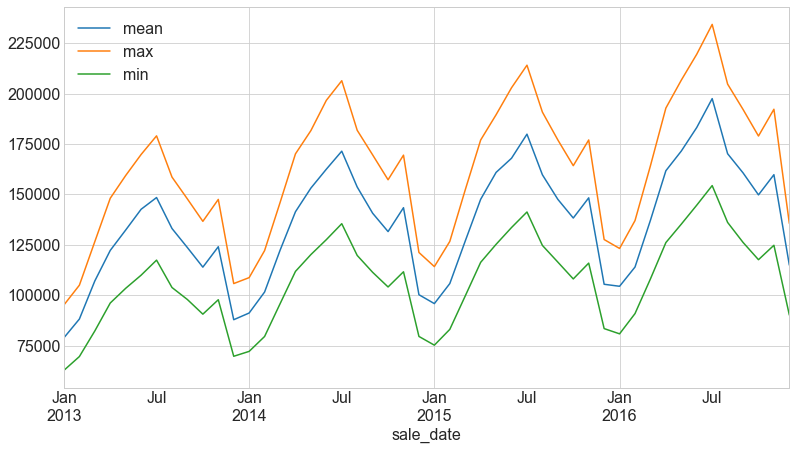

In [42]:
y.resample('M').agg(['mean', 'max', 'min']).plot()

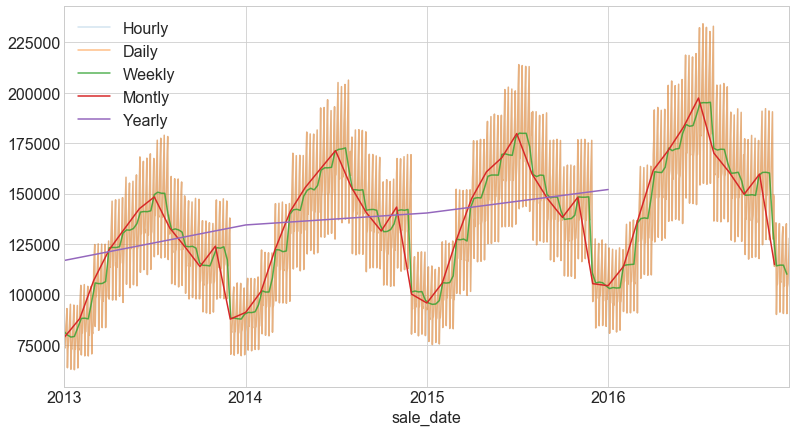

In [43]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

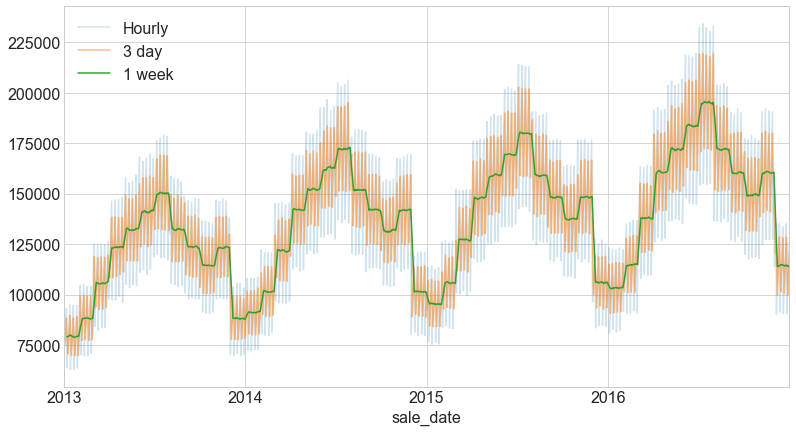

In [44]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()